# 1. File I/O Settings

In [1]:
hindcast_data_file = 'test_data/NMME_data_Tanzania.csv' #data used for cross-validated hindcast skill analysis, and to train forecast model
forecast_data_file = 'test_data/NMME_data_Tanzania_forecast.csv' #data fed to trained model to produce forecasts
hindcast_export_file = 'tanzania.csv' #'None' or the name of a file to save cross validated hindcasts 

# 2. Cross-Validated Hindcast Skill Evaluation
#### 2a. Analysis Settings

In [2]:
mme_methodologies = ['EM', 'MLR', 'ELM', ] #list of MME methodologies to use 
skill_metrics = ['SpearmanCoef', 'PearsonCoef', 'RMSE', 'MAE', 'IOA'] #list of metrics to compute - available: ['SpearmanCoef', 'SpearmanP', 'PearsonCoef', 'PearsonP', 'MSE', 'MAE', 'RMSE', 'IOA']

#### 2b. Model Parameters

In [3]:
args = {
    #EnsembleMean settings
    'em_xval_window': 1,               #odd number - behavior undefined for even number

    #MLR Settings
    'mlr_fit_intercept': True,         #Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered) (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
    'mlr_xval_window': 1,               #odd number - behavior undefined for even number
    'mlr_standardization': None,        #'std_anomaly' or None

    #ELM Settings 
    'elm_xval_window': 1,              #odd number - behavior undefined for even number
    'elm_hidden_layer_neurons':10,     #number of hidden layer neurons - overridden if using PCA init
    'elm_activation': 'sigm',          #“lin” for linear, “sigm” or “tanh” for non-linear, “rbf_l1”, “rbf_l2” or “rbf_linf” for radial basis function neurons (https://hpelm.readthedocs.io/en/latest/api/elm.html)
    'elm_standardization' : 'minmax',  #'minmax' or 'std_anomaly' or None
    'elm_minmax_range': [-1, 1]        #choose [minimum, maximum] values for minmax scaling. ignored if not using minmax scaling
}


#### 2c. Model Construction - Do Not Edit 

In [4]:
import pyelmmme as pm #load pymme files 

mme = pm.MME() #create MME object 
mme.read_txt(hindcast_data_file)
mme.compute_mmes(mme_methodologies, args)
mme.compute_skill(skill_metrics)


Computing MMEs
EM
MLR
ELM

Calculating Skill
SpearmanCoef
PearsonCoef
RMSE
MAE
IOA


#### 2d. Cross-Validated Hindcast Timeline - Do Not Edit

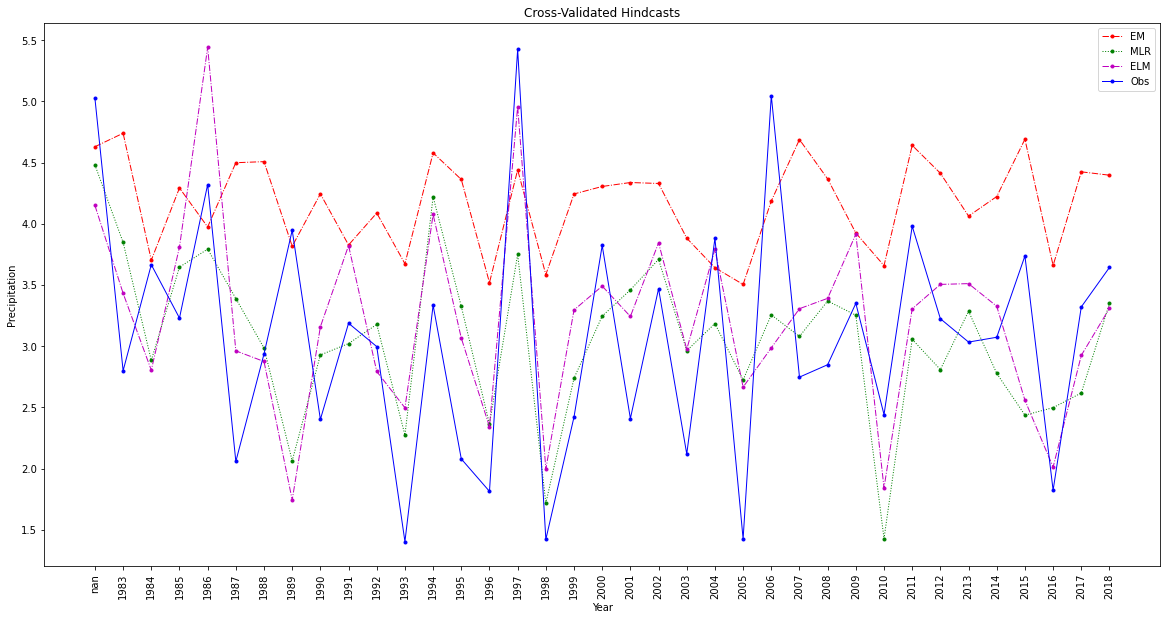

In [5]:
plots = mme_methodologies
plots.append('Obs')
mme.plot( methods=plots, metrics=skill_metrics)

#### 2e. Cross-Validated Hindcast Skill Metrics & Distributions - Do Not Edit

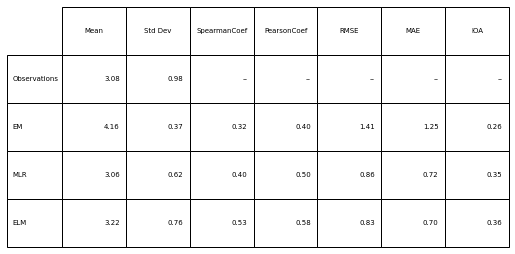

In [6]:
mme.plot(setting='xval_hindcast_skill', hindcasts=mme_methodologies, metrics=skill_metrics)

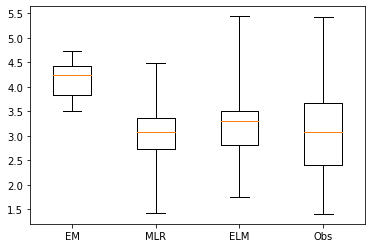

In [7]:
mme.plot(setting='boxplot', hindcasts=plots, metrics=skill_metrics)

#### 2f. Saving MME & Exporting Cross-Validated Hindcasts - Do Not Edit

In [8]:
mme.export(hindcast_export_file)
print('Saved hindcast data to {}'.format(hindcast_export_file))

Saved hindcast data to tanzania.csv


# 3. Real Time Forecasting
#### 3a. RTF Settings

In [9]:
#forecast analysis parameters 
forecast_methodologies = ['EM', 'MLR', 'ELM' ]
forecast_observed_file = 'test_data/forecast_obs.csv'


#### 3b. Computation - do not edit

In [10]:
inputs = mme.read_txt(forecast_data_file, is_forecast=True)
mme.train_rtf_models(forecast_methodologies, args)
mme.compute_rtf(inputs, forecast_methodologies, args)


Computing MMEs
EM
MLR
ELM
EM
MLR
ELM


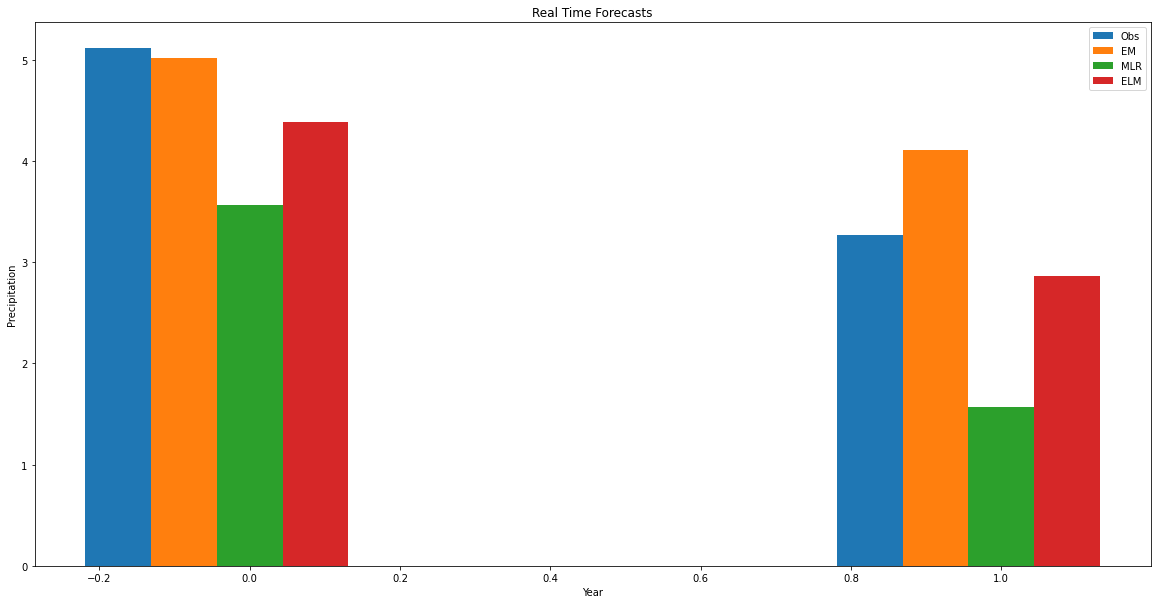

In [11]:
mme.plot( setting='Real Time Forecasts', methods=forecast_methodologies, fos=forecast_observed_file) #make this a bar plot